# 0. Basic Setup and Exploration

In [18]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.neural_network import MLPRegressor
from math import sqrt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# make the output stable across runs
np.random.seed(42)

In [19]:
# read the data
wine_raw = pd.read_csv('wine.csv')

In [20]:
wine_raw.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [21]:
wine_raw.shape

(1599, 12)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


(0.0, 690.0)

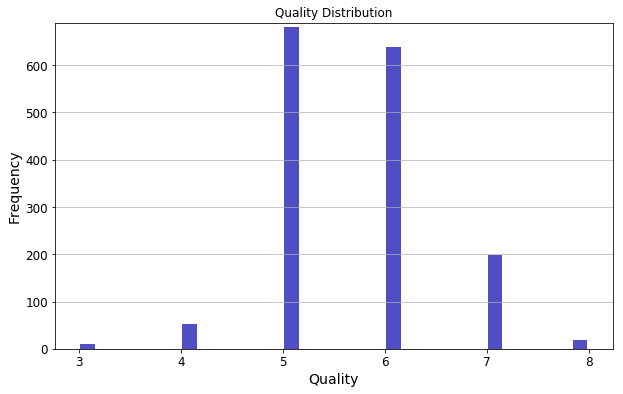

In [74]:
# explore the target variable: quality
print(wine_raw.quality.value_counts().sort_index())
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(wine_raw.quality, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.85)
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality Distribution')
maxfreq = n.max()
# set the y limit
plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


# 1. Decision Tree Classification

## 1.1 Multi-class Classification

In [24]:
# Selecting the input and output features for tasks
features = ['fixed_acidity',
            'volatile_acidity',
            'citric_acid',
                'residual_sugar',
            'chlorides',
                'free_sulfur_dioxide',
            'total_sulfur_dioxide',
            'density',
                'ph',
            'sulphates',
            'alcohol']
target = ['quality']

X = wine_raw[features]
y = wine_raw[target]

# Visualize the combined table (which should looks the same as the original dataset)
# pd.concat([X, y], axis=1, sort=False).head()

In [25]:
# Split dataset into training set & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Fit on train set
# wine_clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=200)
clf = DecisionTreeClassifier(max_features = 5, random_state = 42, max_depth = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

Decision Tree Accuracy: 0.615625
Confusion matrix:
 [[  0   0   0   1   0   0]
 [  0   0   6   2   2   0]
 [  0   5 108  31   2   0]
 [  0   0  44  73  11   0]
 [  0   0   3  15  16   0]
 [  0   0   0   1   0   0]]


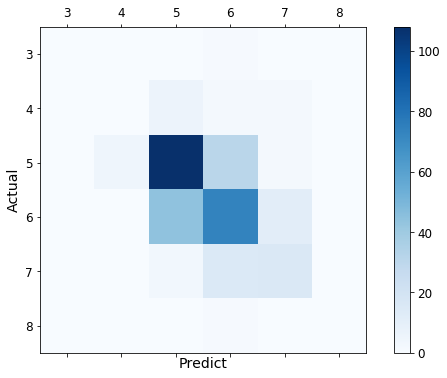

In [75]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

print("Decision Tree Accuracy:",accuracy_score(y_test, clf.predict(X_test)))



conf_mat = confusion_matrix(y_test, clf.predict(X_test))
# plot_confusion_matrix(conf_mat, classes=class_names, title='Confusion matrix')
print('Confusion matrix:\n', conf_mat)

labels = [3,4,5,6,7,8]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## 1.2 Binary Classification

In [28]:
# Convert to a Binary Classification Task
# Create a new column called Quality Label. This column will contain the values of 0 & 1
# where 1 = good, 0 = bad
wine2 = wine_raw
wine2['quality_label'] = (wine2['quality'] > 5.5)*1
wine2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


0    744
1    855
Name: quality_label, dtype: int64


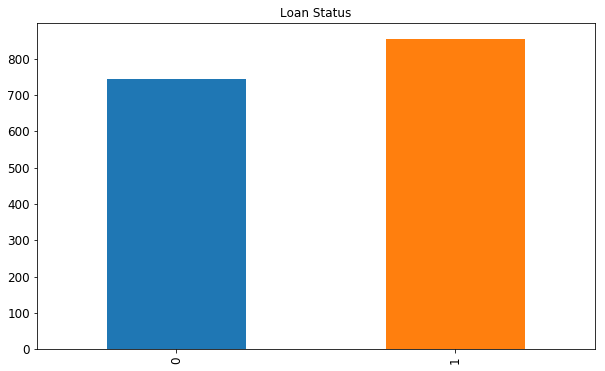

In [76]:
# explore the target variable: quality
print(wine2.quality_label.value_counts().sort_index())
plt.figure(figsize=(10,6))
wine2.quality_label.value_counts().sort_index().plot(kind='bar', title='Loan Status');

In [30]:
# Selecting the input and output features for classification tasks
features2 = ['fixed_acidity',
             'volatile_acidity',
             'citric_acid',
             'residual_sugar',
             'chlorides',
            'free_sulfur_dioxide',
             'total_sulfur_dioxide',
             'density',
             'ph',
             'sulphates',
             'alcohol']
target2 = ['quality_label']

In [31]:
X2 = wine2[features2]
y2 = wine2[target2]

In [32]:
# Split dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=200)

In [33]:
# Fit on train set
# wine_clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=200)
clf2 = DecisionTreeClassifier(max_features = 6, random_state = 42, max_depth = 6)
clf2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [34]:
# Predict on test data
prediction2 = clf2.predict(X2_test)
print(prediction2[:5])
print('-'*10)
print(y2_test['quality_label'][:5])

[1 1 1 0 1]
----------
366     1
1325    1
133     1
1418    0
1258    1
Name: quality_label, dtype: int64


In [35]:
# Measure accuracy of the classifier
accuracy_score(y_true=y2_test, y_pred=prediction2)

0.740625

Decision Tree Accuracy: 0.740625
Confusion matrix:
 [[114  43]
 [ 40 123]]


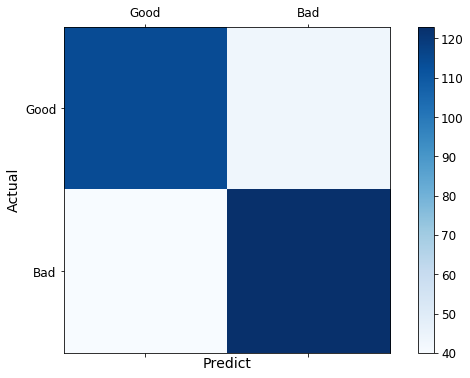

In [77]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

print("Decision Tree Accuracy:",accuracy_score(y2_test, clf2.predict(X_test)))

conf_mat = confusion_matrix(y2_test, clf2.predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = ['Good', 'Bad'] # should be it Bad, Good?
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [59]:
from sklearn.model_selection import cross_val_predict, cross_val_score
cv = 3
print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf2,X2_train,y2_train,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf2,X2_train,y2_train,cv=cv,scoring='roc_auc'))))

AUC: 0.73393 +/- 0.0142


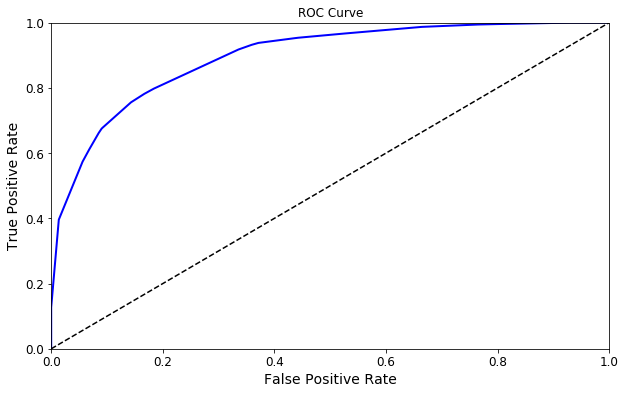

ROC/AUC score for training set is 0.895


In [89]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
probs = clf2.predict_proba(X2_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y2_train, preds)
roc_auc = roc_auc_score(y2_train, preds)

plt.figure(figsize=(10,6))

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'b', linewidth=2, label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()
        
print('ROC/AUC score for training set is %0.3f' % roc_auc_score(y2_train, preds))

<Figure size 720x432 with 0 Axes>

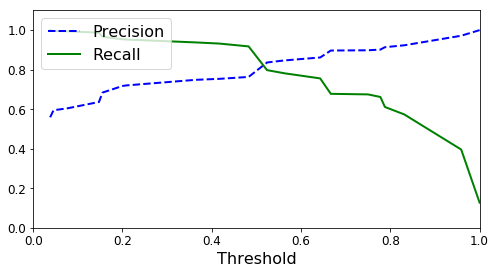

In [91]:
# Plot the precision recall curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y2_train, preds)

plt.figure(figsize=(10,6))

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1.1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.show()

# 2. Random Forest

## 2.1 Multi-class

/Users/simon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy: 0.665625
Confusion matrix:
 [[  0   0   1   0   0   0]
 [  0   0   5   3   2   0]
 [  1   1 112  30   2   0]
 [  0   2  34  85   7   0]
 [  0   0   1  17  16   0]
 [  0   0   0   0   1   0]]


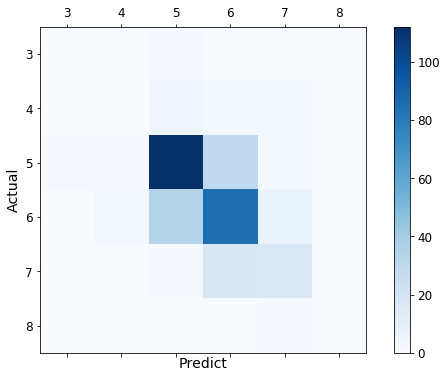

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))
conf_mat = confusion_matrix(y_test, rf_clf.predict(X_test))
print('Confusion matrix:\n', conf_mat)

labels = [3,4,5,6,7,8]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## 2.2 Binary

Random Forest Accuracy: 0.828125
Confusion matrix:
 [[137  20]
 [ 35 128]]


/Users/simon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


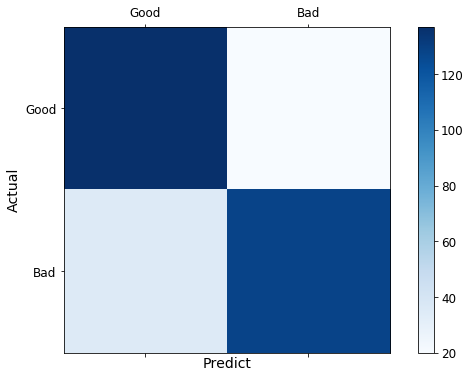

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(X2_train, y2_train)

print("Random Forest Accuracy:", accuracy_score(y2_test, rf_clf2.predict(X2_test)))
conf_mat = confusion_matrix(y2_test, rf_clf2.predict(X2_test))
print('Confusion matrix:\n', conf_mat)

labels = ['Good', 'Bad'] # should be it Bad, Good?
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_predict, cross_val_score
cv = 3
print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(rf_clf2,X2_train,y2_train,cv=cv,scoring='roc_auc')),np.std(cross_val_score(rf_clf2,X2_train,y2_train,cv=cv,scoring='roc_auc'))))

AUC: 0.83831 +/- 0.0281


/Users/simon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/simon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/simon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/simon/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConvers

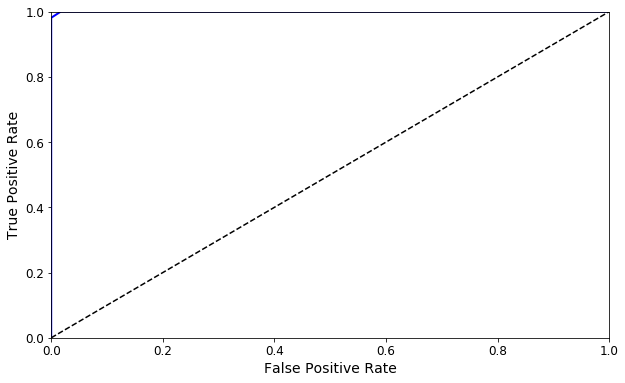

ROC/AUC score for training set is 1.000


In [94]:
# Plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
probs = rf_clf2.predict_proba(X2_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y2_train, preds)
roc_auc = roc_auc_score(y2_train, preds)

plt.figure(figsize=(10,6))

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'b', linewidth=2, label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()
        
print('ROC/AUC score for training set is %0.3f' % roc_auc_score(y2_train, preds))

# 3. Decision Tree Classifier Visualizations

In [46]:
# import visualization libraries
from IPython.display import Image  
import pydotplus
from sklearn.externals.six import StringIO
from sklearn import tree

# 3.1 Multi-class

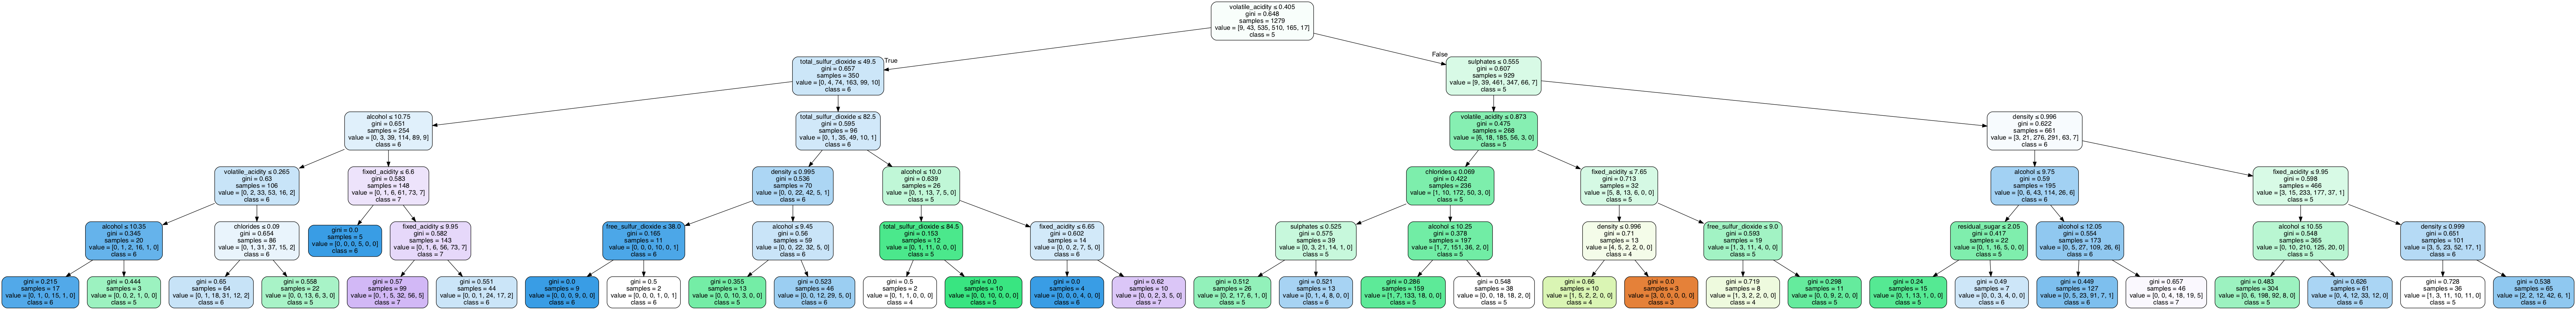

In [62]:
feature_names = np.array(features)
target_names = ['3','4','5','6','7','8']

dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=feature_names,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("wine_dt_1.png")
Image(graph.create_png()) 

## 3.2 Binary

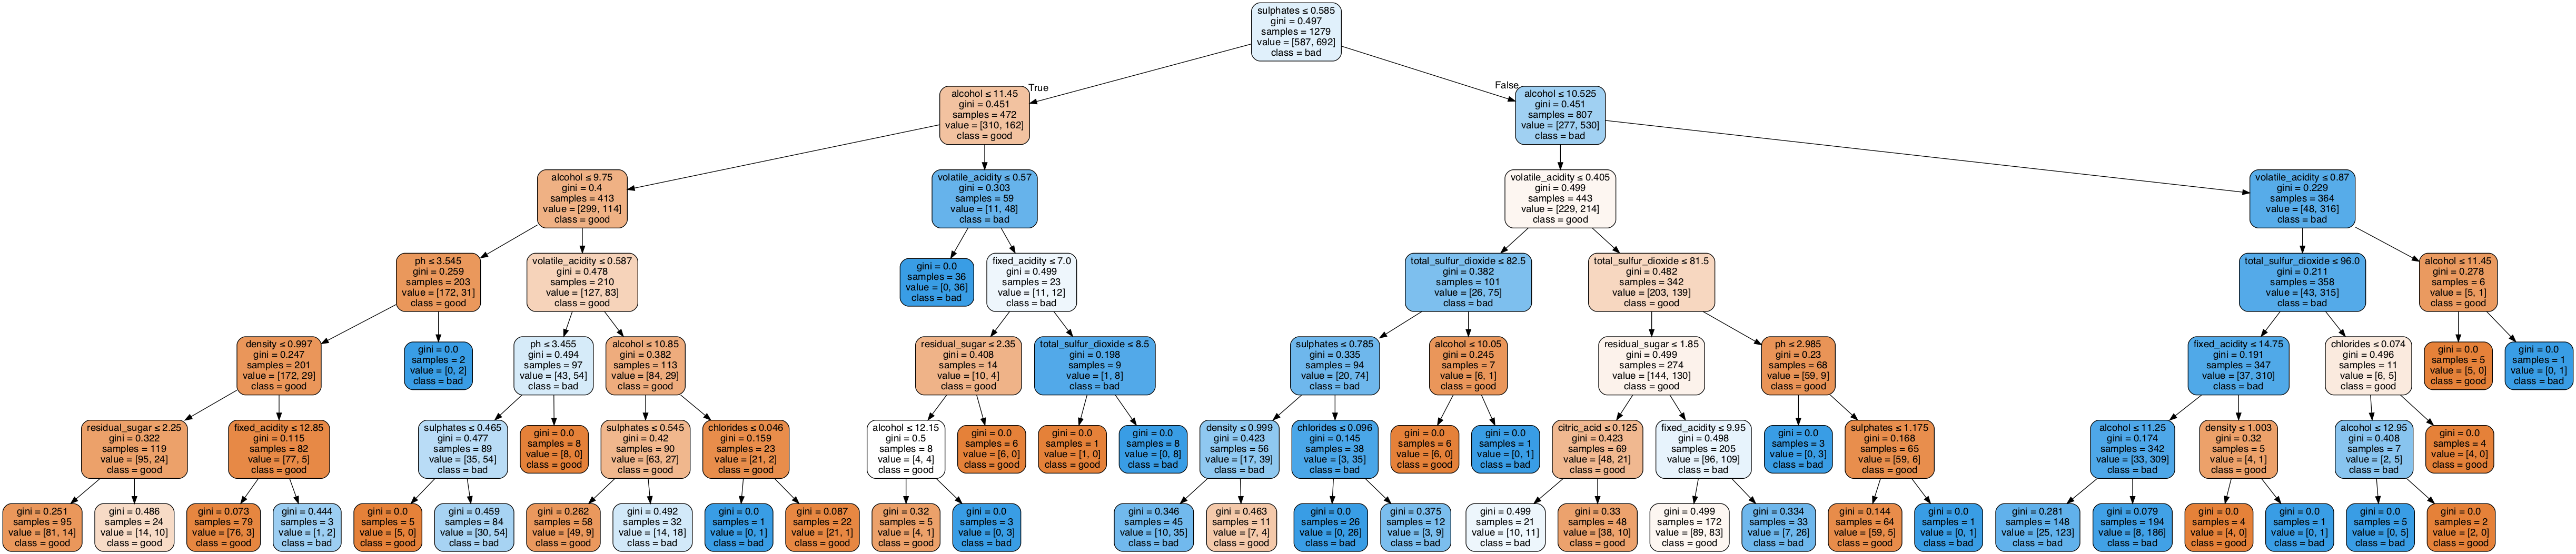

In [63]:
feature_names2 = np.array(features)
target_names2 = ['good','bad']

dot_data = tree.export_graphviz(clf2, out_file=None,
                         feature_names=feature_names2,
                         class_names=target_names2,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("wine_dt_2.png")
Image(graph.create_png()) 

# 6. Conclusion and Limitations

- The dataset is relatively small (1599 observations)
- The dataset is special so the fields might not be widely available in industry wise;
- For the future use, we might have limited fields data available so the model could not work as this dataset;
- ...